# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

**Sumber Dataset**:  
https://www.kaggle.com/c/titanic/data

**Fitur**:  
1. **PassengerId**  
   Nomor unik identifikasi untuk setiap penumpang.

2. **Survived**  
   Target variabel yang menunjukkan apakah penumpang selamat (1) atau meninggal (0) dalam kecelakaan Titanic.

3. **Pclass**  
   Kelas tiket penumpang (1 = kelas satu, 2 = kelas dua, 3 = kelas tiga).

4. **Name**  
   Nama lengkap penumpang.

5. **Sex**  
   Jenis kelamin penumpang (male = laki-laki, female = perempuan).

6. **Age**  
   Usia penumpang dalam satuan tahun.

7. **SibSp**  
   Jumlah saudara kandung atau pasangan yang ikut bersama penumpang di kapal.

8. **Parch**  
   Jumlah orang tua atau anak yang ikut bersama penumpang di kapal.

9. **Ticket**  
   Nomor tiket penumpang.

10. **Fare**  
    Tarif atau harga tiket yang dibayar penumpang.

11. **Cabin**  
    Nomor kabin penumpang, terdapat banyak nilai yang hilang.

12. **Embarked**  
    Pelabuhan keberangkatan penumpang. C = Cherbourg, Q = Queenstown, S = Southampton



# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv('titanic_raw.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

INFO DATA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


KORELASI NUMERIK

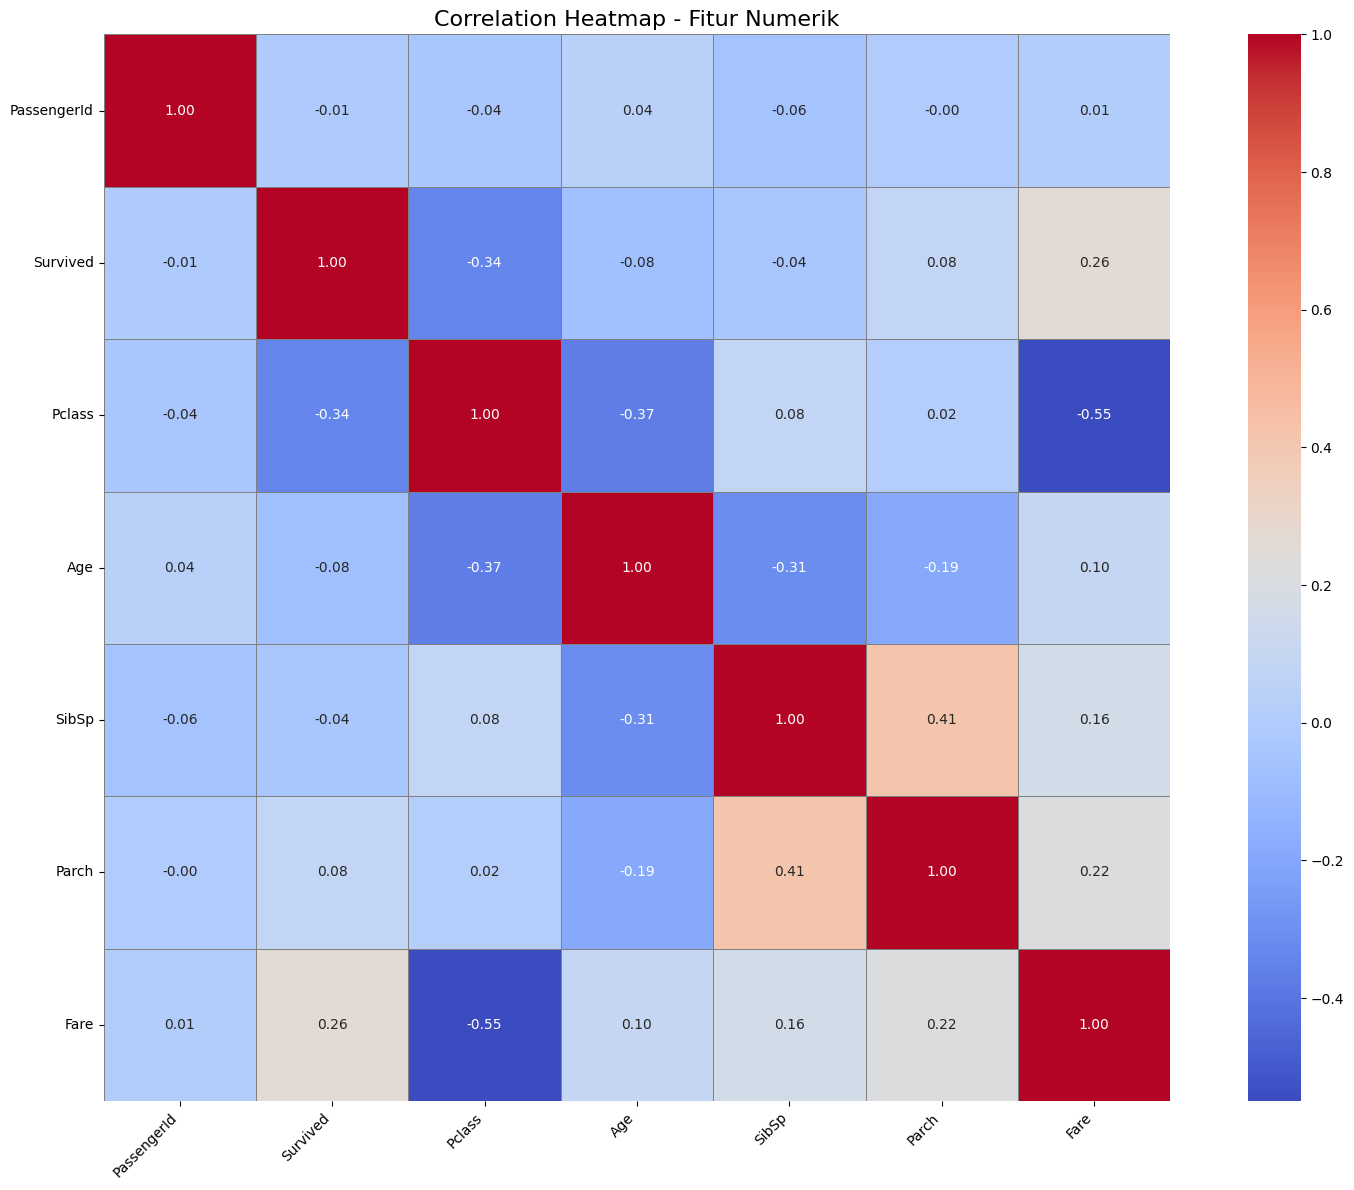

In [4]:
# Pilih kolom numerik
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
# Create the numerical_df
numerical_df = df[numerical_cols]

plt.figure(figsize=(16, 12))  # Perbesar area plot
sns.heatmap(numerical_df.corr(),
            annot=True,            # Tampilkan angka korelasi
            fmt=".2f",             # Dua angka desimal
            cmap='coolwarm',       # Skema warna
            cbar=True,             # Tampilkan colorbar
            square=True,           # Kotak per sel
            linewidths=0.5,        # Garis antar sel
            linecolor='gray')      # Warna garis antar sel

plt.title('Correlation Heatmap - Fitur Numerik', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Putar label X
plt.yticks(rotation=0)               # Label Y tetap horizontal
plt.tight_layout()
plt.show()


DISTRIBUSI FITUR NUMERIK

<Figure size 1800x1500 with 0 Axes>

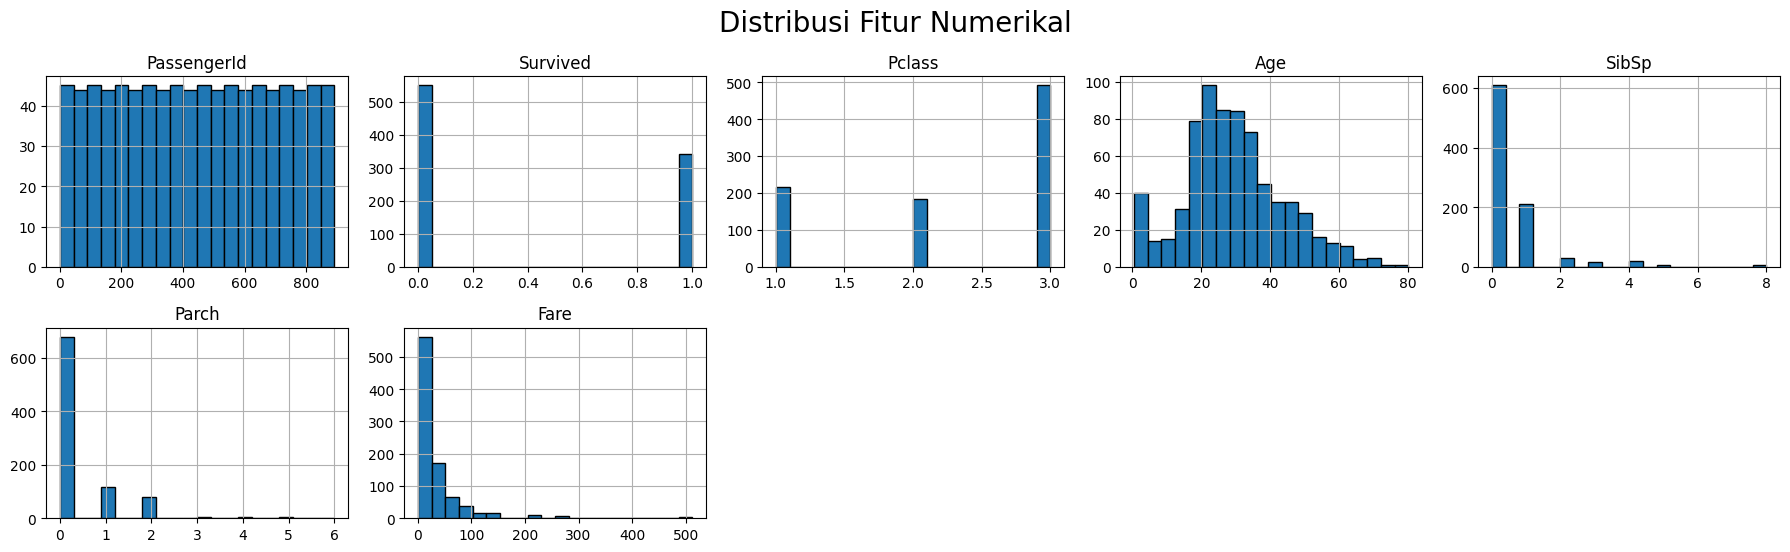

In [5]:
# Tentukan ukuran figure dan grid
plt.figure(figsize=(18, 15))
df[numerical_cols].hist(bins=20, layout=(6, 5), figsize=(18, 15), edgecolor='black')
plt.tight_layout()
plt.suptitle("Distribusi Fitur Numerikal", fontsize=20, y=1.02)
plt.show()


UNIQUE VALUE NUMERIK

In [6]:
# Hitung jumlah unique value untuk setiap kolom numerik
unique_counts_num = df[numerical_cols].nunique().sort_values(ascending=False)

# Tampilkan hasil
unique_counts_num

,0
PassengerId,891
Fare,248
Age,88
SibSp,7
Parch,7
Pclass,3
Survived,2


NILAI TERTINGGI DAN TERENDAH FITUR NUMERIK

In [7]:
df[numerical_cols].agg(['min', 'max'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
min,1,0,1,0.42,0,0,0.0000
max,891,1,3,80.00,8,6,512.3292


DISTRIBUSI FITUR KATEGORIKAL

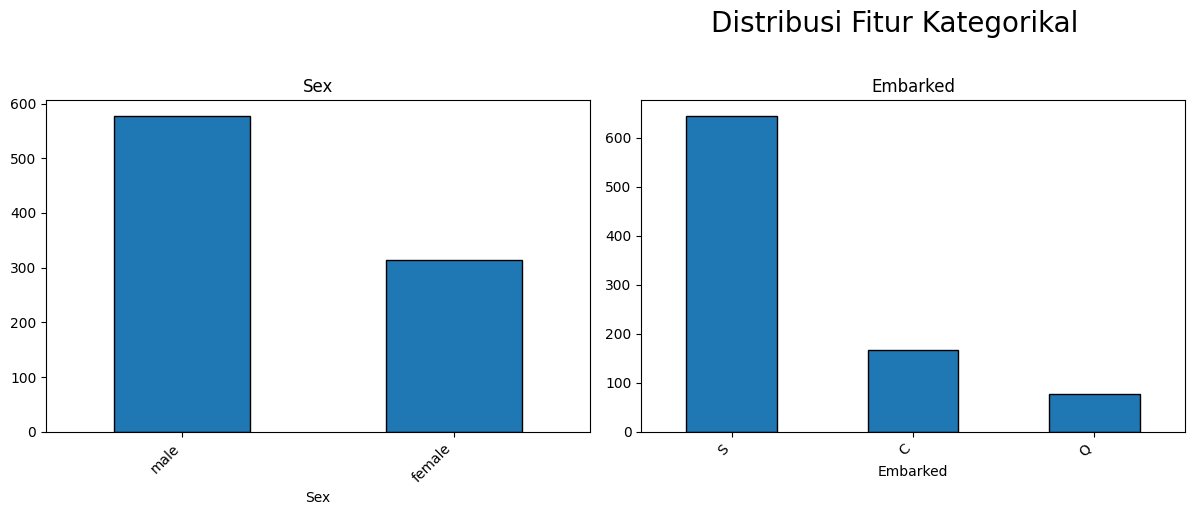

In [8]:
categorical_cols = df.select_dtypes(include=['object']).columns# Batasi jumlah kategori yang ditampilkan
top_n = 20

# Buat list kolom kategorikal dengan jumlah kategori yang masuk akal (misal <= 50)
categorical_df = [col for col in categorical_cols if df[col].nunique() <= 50]

# Tentukan ukuran grid
n_cols = 3
n_rows = (len(categorical_df) + n_cols - 1) // n_cols

plt.figure(figsize=(6 * n_cols, 5 * n_rows))

for i, col in enumerate(categorical_df, 1):
    plt.subplot(n_rows, n_cols, i)
    df[col].value_counts().nlargest(top_n).plot(kind='bar', edgecolor='black')
    plt.title(col)
    plt.xticks(rotation=45, ha='right')

plt.suptitle("Distribusi Fitur Kategorikal", fontsize=20, y=1.02)
plt.tight_layout()
plt.show()


UNIQUE VALUE KATEGORIKAL

In [9]:
# Hitung jumlah unique value untuk setiap kolom kategorikal
unique_counts_cat = df[categorical_cols].nunique().sort_values(ascending=False)

# Tampilkan hasil
unique_counts_cat

,0
Name,891
Ticket,681
Cabin,147
Embarked,3
Sex,2


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

DROP DATA TIDAK PENTING

In [10]:
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
df = df.dropna()  # Hapus baris dengan missing value
df = df.reset_index(drop=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
707,0,3,female,39.0,0,5,29.1250,Q
708,0,2,male,27.0,0,0,13.0000,S
709,1,1,female,19.0,0,0,30.0000,S
710,1,1,male,26.0,0,0,30.0000,C


ENCODE DATA KATEGORIKAL

In [11]:
le = LabelEncoder()
label_cols = ['Sex', 'Embarked']

for col in label_cols:
    df[col] = le.fit_transform(df[col])

In [12]:
df.agg(['min', 'max'])

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
min,0,1,0,0.42,0,0,0.0000,0
max,1,3,1,80.00,5,6,512.3292,2


In [13]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
707,0,3,0,39.0,0,5,29.1250,1
708,0,2,1,27.0,0,0,13.0000,2
709,1,1,0,19.0,0,0,30.0000,2
710,1,1,1,26.0,0,0,30.0000,0


In [16]:
# Split data menjadi train dan test
train_df, test_df = train_test_split(df, random_state=42)

# Simpan hasil preprocessing dan split
train_df.to_csv('train.csv', index=False)
test_df.to_csv('test.csv', index=False)

print("Preprocessing dan split data selesai, file tersimpan di folder")

Preprocessing dan split data selesai, file tersimpan di folder
